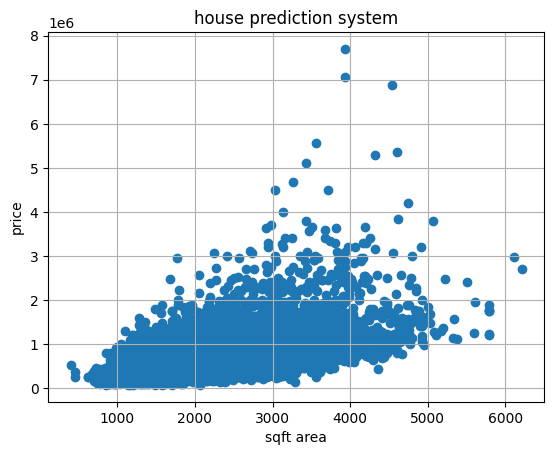

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv("house.csv")
plt.scatter(x=df['sqft_living15'],y=df['price'])
plt.title("house prediction system")
plt.xlabel("sqft area")
plt.ylabel("price")
plt.grid(True)
plt.show()